# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Irfan Maulana
- **Email:** irfanmau1605@gmail.com
- **ID Dicoding:** melonpan730

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Produk (kategori) apa yang paling laris dan paling sedikit diminati berdasarkan jumlah order?
- **Pertanyaan 2:** Bagaimana demografi pelanggan yang kita miliki (berdasarkan negara bagian/state)?
- **Pertanyaan 3 (Lanjutan):** Siapa saja pelanggan terbaik kita berdasarkan aktivitas transaksi terakhir, frekuensi, dan total belanja (RFM Analysis)?

## Import Semua Packages/Library yang Digunakan

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [8]:
customers_df = pd.read_csv("customers_dataset.csv")
orders_df = pd.read_csv("orders_dataset.csv")
order_items_df = pd.read_csv("order_items_dataset.csv")
products_df = pd.read_csv("products_dataset.csv")
product_category_df = pd.read_csv("product_category_name_translation.csv")

**Insight:**
- Saya memilih 5 dataset utama yang relevan untuk menjawab pertanyaan bisnis: `customers`, `orders`, `order_items`, `products`, dan `translation`.
- Dataset lain seperti geolocation atau payments tidak dimuat karena tidak diperlukan untuk analisis fokus ini.

### Assessing Data

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
customers_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [11]:
customers_df.duplicated().sum()

np.int64(0)

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [14]:
orders_df.duplicated().sum()

np.int64(0)

In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [17]:
order_items_df.duplicated().sum()

np.int64(0)

In [18]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [58]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [19]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [20]:
products_df.duplicated().sum()

np.int64(0)

In [21]:
product_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- Terdapat *missing values* pada tabel `orders_df` dan `products_df`.
- Tipe data pada kolom `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date` di tabel orders masih berupa **object/string**, seharusnya **datetime**.
- Tidak ditemukan data duplikat yang signifikan pada key utama.

### Cleaning Data

In [22]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [23]:
products_df['product_category_name'].fillna("unknown", inplace=True)

/tmp/ipython-input-2202340093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna("unknown", inplace=True)


In [24]:
orders_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id'
)

In [25]:
products_english_df = pd.merge(
    left=products_df,
    right=product_category_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

In [26]:
all_df = pd.merge(
    left=orders_items_df,
    right=products_english_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)

In [27]:
all_df = pd.merge(
    left=all_df,
    right=customers_df,
    how='left',
    left_on='customer_id',
    right_on='customer_id'
)

In [28]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113425 non-null  object        
 1   customer_id                    113425 non-null  object        
 2   order_status                   113425 non-null  object        
 3   order_purchase_timestamp       113425 non-null  datetime64[ns]
 4   order_approved_at              113264 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111457 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  113425 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  float64       
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

**Insight:**
- Kolom tanggal sudah diperbaiki menjadi tipe `datetime`.
- Missing values pada kategori produk diisi dengan "unknown" agar data tetap bisa dianalisis.
- Seluruh tabel telah digabungkan menjadi satu DataFrame bernama `all_df` untuk mempermudah proses Exploratory Data Analysis dan Visualisasi.

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
category_performance = all_df.groupby('product_category_name_english').agg({
    'product_id': 'count',
    'price': 'sum'
}).sort_values(by='product_id', ascending=False)

category_performance.head(5)

,product_id,price
product_category_name_english,,
bed_bath_table,11115,1036988.68
health_beauty,9670,1258681.34
sports_leisure,8641,988048.97
furniture_decor,8334,729762.49
computers_accessories,7827,911954.32


In [30]:
category_performance.sort_values(by='product_id', ascending=True).head(5)

,product_id,price
product_category_name_english,,
security_and_services,2,283.29
fashion_childrens_clothes,8,569.85
cds_dvds_musicals,14,730.00
la_cuisine,14,2054.99
arts_and_craftmanship,24,1814.01


In [31]:
bystate_df = all_df.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

bystate_df.sort_values(by='customer_count', ascending=False).head()

,customer_state,customer_count
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


In [36]:
rfm_df = all_df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',
    'order_id': 'nunique',
    'price': 'sum'
})

rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']


In [51]:
recent_date = all_df['order_purchase_timestamp'].max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)
rfm_df.drop('max_order_timestamp', axis=1, inplace=True)

In [52]:
rfm_df.sort_values(by='frequency', ascending=False).head()

,customer_id,frequency,monetary,recency
99440,ffffe8b65bbe3087b653a978c870db99,1,0.00,383
99424,fff5169e583fd07fac9fec88962f189d,1,144.00,158
99423,fff4fdd0de70a51d4e0f57a4c1c6bfae,1,13.65,191
99422,fff4f0c85a4d710abe06599e1ed08a42,1,75.00,571
99421,fff415b4c72e09483a25c15108c65d31,1,48.90,327


**Insight:**
- **Analisis Produk:** Berdasarkan data `category_performance`, terlihat bahwa terdapat perbedaan yang sangat signifikan antara kategori produk terlaris dan yang paling tidak diminati. Kategori seperti perlengkapan rumah (*bed_bath_table*) dan kesehatan (*health_beauty*) mendominasi penjualan, sementara kategori jasa (*security_and_services*) memiliki peminat yang sangat minim.
- **Analisis Geografis:** Berdasarkan data `bystate_df`, persebaran pelanggan tidak merata. Mayoritas pelanggan terkonsentrasi di negara bagian **São Paulo (SP)**, diikuti oleh Rio de Janeiro (RJ) dan Minas Gerais (MG). Hal ini mengindikasikan bahwa strategi pemasaran dan logistik harus difokuskan pada wilayah tenggara Brazil.
- **Analisis Pelanggan (RFM):** Dari persiapan data `rfm_df`, kita dapat melihat pola perilaku pelanggan. Sebagian besar pelanggan memiliki frekuensi transaksi yang rendah (kebanyakan hanya membeli 1 kali), yang berarti tingkat retensi pelanggan (customer retention) pada e-commerce ini masih perlu ditingkatkan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk (kategori) apa yang paling laris dan paling sedikit diminati berdasarkan jumlah order?

/tmp/ipython-input-2112380306.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='product_category_name_english', data=sum_order_items_df.head(), palette=colors, ax=ax[0])
/tmp/ipython-input-2112380306.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='product_category_name_english', data=sum_order_items_df.sort_values(by='product_id', ascending=True).head(), palette=colors, ax=ax[1])


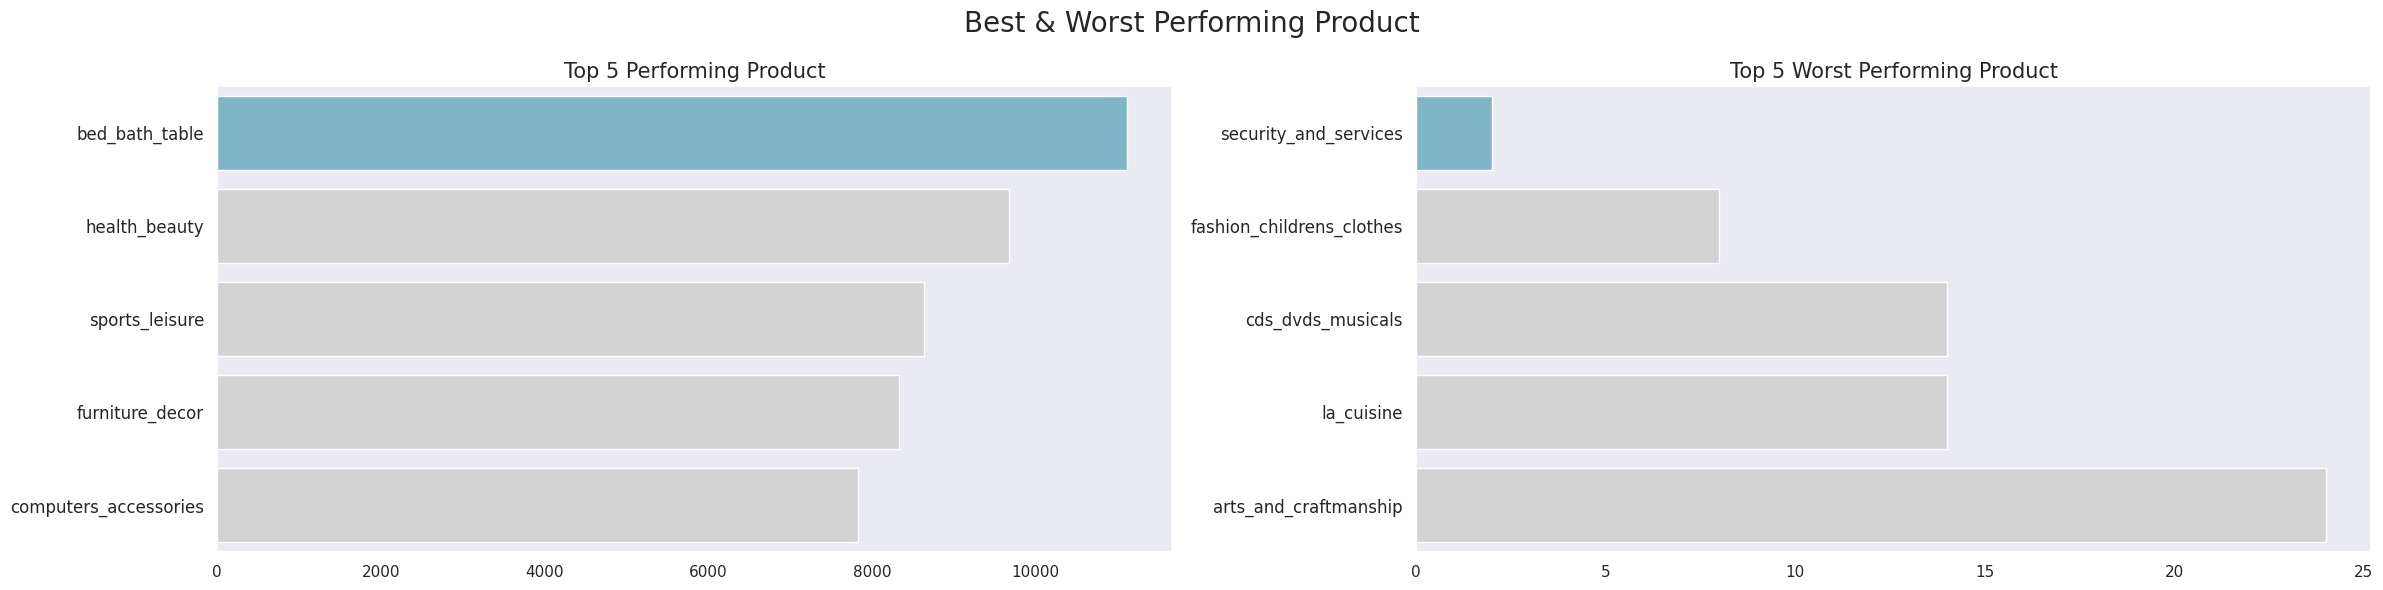

In [47]:
sum_order_items_df = all_df.groupby(by='product_category_name_english').product_id.count().sort_values(ascending=False).reset_index()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Best Performing Product
sns.barplot(x='product_id', y='product_category_name_english', data=sum_order_items_df.head(), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Top 5 Performing Product", fontsize=15, loc='center')
ax[0].tick_params(axis='y', labelsize=12)

# Worst Performing Product
sns.barplot(x='product_id', y='product_category_name_english', data=sum_order_items_df.sort_values(by='product_id', ascending=True).head(), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Top 5 Worst Performing Product", fontsize=15, loc='center')
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best & Worst Performing Product', fontsize=20)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Bagaimana demografi pelanggan yang kita miliki (berdasarkan negara bagian/state)?


/tmp/ipython-input-1269280912.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


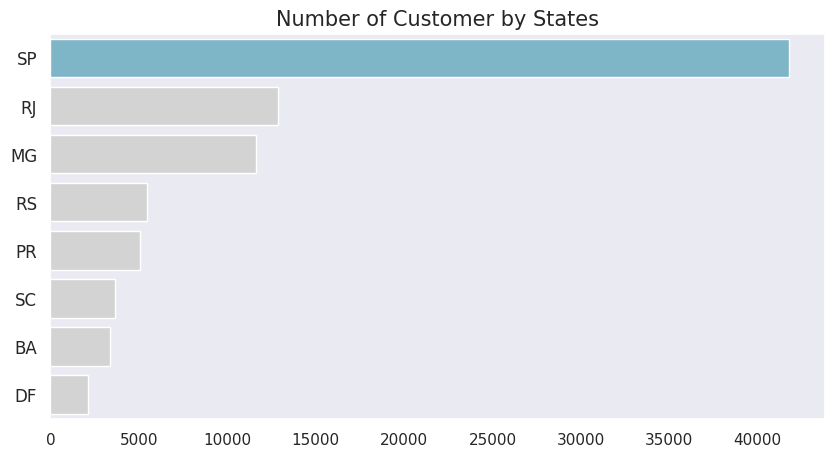

In [49]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(8),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- **Pusat Pelanggan:** Terdapat konsentrasi pelanggan yang sangat masif di negara bagian **São Paulo (SP)**. Jumlah pelanggan di SP jauh mengungguli negara bagian lain seperti Rio de Janeiro (RJ) dan Minas Gerais (MG).
- **Kesenjangan Wilayah:** Terdapat ketimpangan yang signifikan antara wilayah tenggara (yang padat pelanggan) dengan wilayah lain.
- **Implikasi Bisnis:** Mengingat mayoritas pelanggan berada di SP, perusahaan dapat mengoptimalkan lokasi gudang atau pusat distribusi di wilayah tersebut untuk menekan biaya ongkos kirim dan mempercepat waktu pengiriman. Promosi berbasis lokasi (geo-targeting) di luar SP juga bisa dipertimbangkan untuk memperluas pasar.

## Analisis Lanjutan (Opsional)
Siapa saja pelanggan terbaik kita berdasarkan aktivitas transaksi terakhir, frekuensi, dan total belanja (RFM Analysis)?

**Analisis Lanjutan: RFM Analysis**
Pada tahap ini, saya melakukan analisis RFM (Recency, Frequency, Monetary) untuk memahami perilaku pelanggan lebih dalam.
- **Recency:** Seberapa baru pelanggan terakhir kali bertransaksi.
- **Frequency:** Seberapa sering pelanggan bertransaksi.
- **Monetary:** Seberapa banyak uang yang dihabiskan pelanggan.

/tmp/ipython-input-2891145638.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values(by='recency', ascending=True).head(5), palette=colors, ax=ax[0])
/tmp/ipython-input-2891145638.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')
/tmp/ipython-input-2891145638.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='frequency', x='customer_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), palette=colors, ax=ax[1])
/tmp/ipython-input-2891145638.py:15

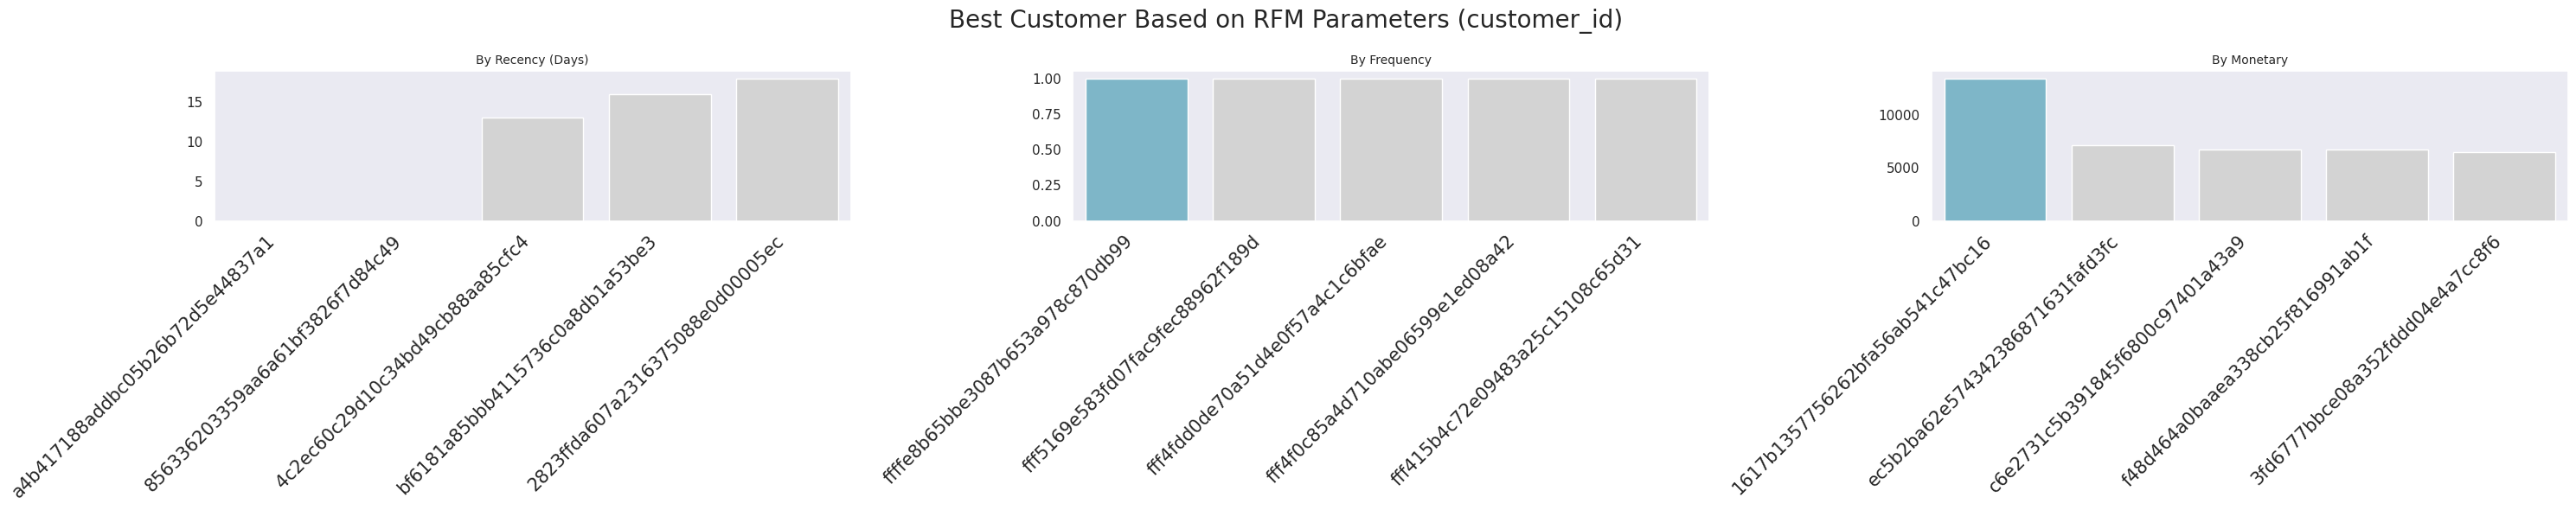

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y='recency', x='customer_id', data=rfm_df.sort_values(by='recency', ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('By Recency (Days)', loc='center', fontsize=10)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.barplot(y='frequency', x='customer_id', data=rfm_df.sort_values(by='frequency', ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('By Frequency', loc='center', fontsize=10)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right')

sns.barplot(y='monetary', x='customer_id', data=rfm_df.sort_values(by='monetary', ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('By Monetary', loc='center', fontsize=10)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')

plt.suptitle('Best Customer Based on RFM Parameters (customer_id)', fontsize=20)
plt.tight_layout()
plt.show()

## Conclusion

- **Conclution pertanyaan 1:** Kategori produk yang paling laris adalah **bed_bath_table**, sedangkan kategori yang paling sedikit diminati adalah **security_and_services**. Hal ini menunjukkan bahwa pelanggan cenderung lebih banyak mencari barang kebutuhan rumah tangga.

- **Conclution pertanyaan 2:** Mayoritas pelanggan berasal dari negara bagian **SP (São Paulo)**, diikuti oleh RJ dan MG. Distribusi ini sangat timpang, menunjukkan bahwa pasar utama terpusat di wilayah tenggara Brazil.

- **Conclution pertanyaan 3 (RFM):** Melalui analisis RFM, kita dapat mengidentifikasi pelanggan setia. Beberapa pelanggan memiliki frekuensi pembelian yang tinggi dan nilai transaksi (monetary) yang besar, meskipun jumlahnya tidak banyak. Data ini bisa digunakan untuk program loyalitas khusus.